In [7]:
import pandas as pd
import seaborn as srn
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('filmes_tmdb.csv')
df.head()

,titulo,data_lancamento,nota_media,numero_votos,popularidade,lingua_original,descricao
0,Como Treinar o Seu Dragão,2025-06-06,8.147,1128,1080.2642,en,"Filho cheio de imaginação, mas negligenciado, ..."
1,M3GAN 2.0,2025-06-25,7.711,435,793.9998,en,Uma arma robótica de nível militar conhecida c...
2,Lilo & Stitch,2025-05-17,7.232,956,529.4998,en,"Stitch, um alienígena, chega ao planeta Terra ..."
3,Um Homem sem Passado,2025-01-13,6.981,26,493.0035,en,"Ao acordar em uma cidade estranha, um homem se..."
4,Demon Slayer: Kimetsu no Yaiba Castelo Infinito,2025-07-18,7.100,14,466.9849,ja,O Corpo de Caçadores de Demônios confronta os ...


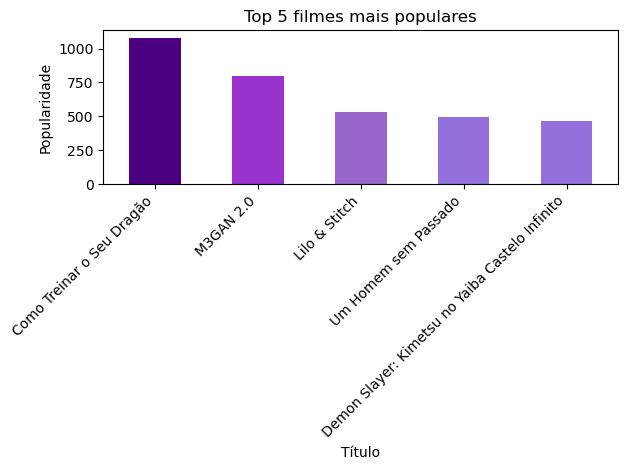

In [131]:
#Top 5 filmes mais populares

top5_populares = df.sort_values(by='popularidade', ascending=False).head(5)
top5_populares = top5_populares.set_index('titulo')
top5_populares['popularidade'].plot(kind='bar', color=['#4B0082', '#9932CC', '#9966CC', '#9370DB', '#9370DB'])
plt.title('Top 5 filmes mais populares')
plt.xlabel('Título')
plt.ylabel('Popularidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

         

Text(0, 0.5, 'Nota média')

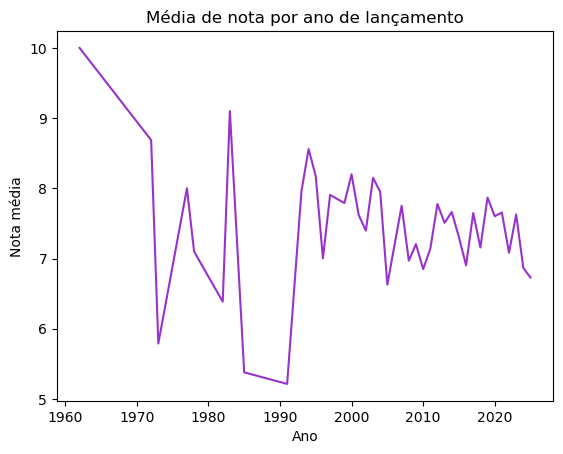

In [133]:
#Media de notas por ano

df['ano'] = pd.to_datetime(df['data_lancamento']).dt.year
nota_por_ano = df.groupby('ano')['nota_media'].mean()
plt.plot(nota_por_ano.index, nota_por_ano.values, color='#9932CC')
plt.title("Média de nota por ano de lançamento")
plt.xlabel("Ano")
plt.ylabel("Nota média")


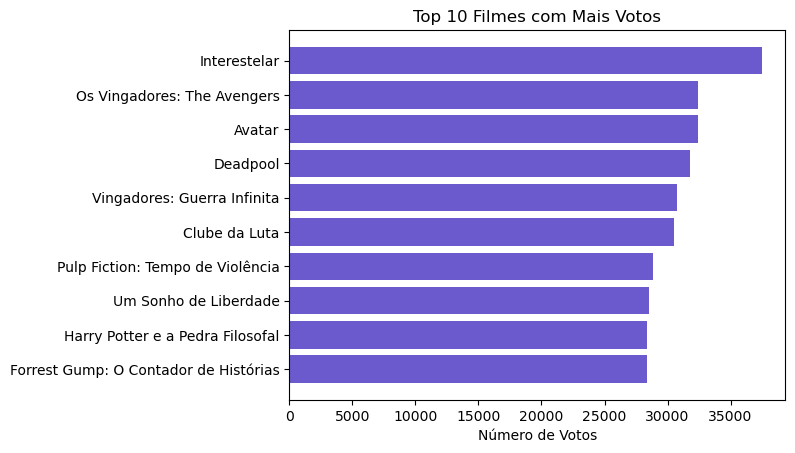

In [137]:
#Top 10 filmes com mais votos

top10_votos = df.sort_values(by='numero_votos', ascending=False).head(10)
top10_votos = top10_votos.set_index('titulo')
plt.barh(top10_votos.index, top10_votos['numero_votos'], color='#6A5ACD')
plt.title('Top 10 Filmes com Mais Votos')
plt.xlabel('Número de Votos')
plt.gca().invert_yaxis()


<Axes: xlabel='nota_media', ylabel='popularidade'>

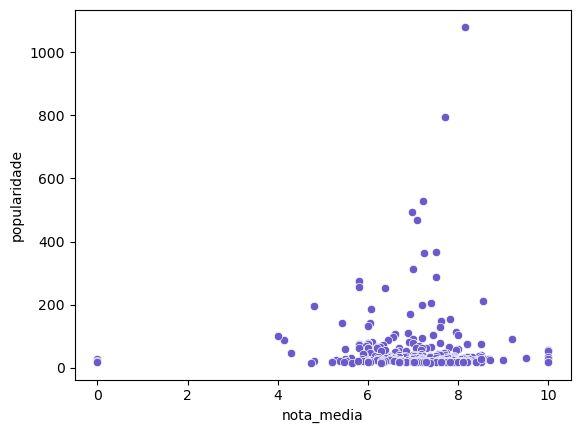

In [144]:
# Dispersão: Popularidade vs. Nota
srn.scatterplot(data=df, x='nota_media', y='popularidade', color='#6A5ACD')

Text(0.5, 1.0, 'Correlação entre Variáveis Numéricas')

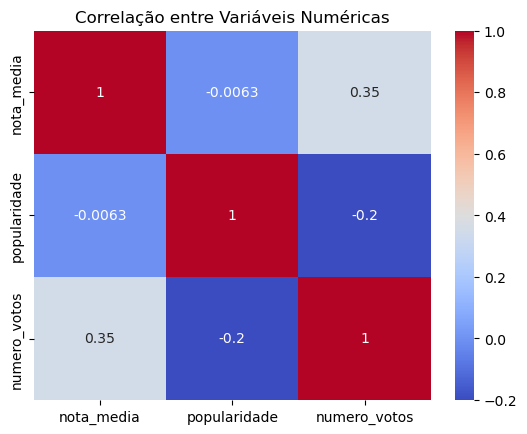

In [148]:
#Heatmap de correlação entre variáveis numéricas

srn.heatmap(df[['nota_media', 'popularidade', 'numero_votos']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')


Text(0.5, 1.0, 'Distribuição das Notas Médias')

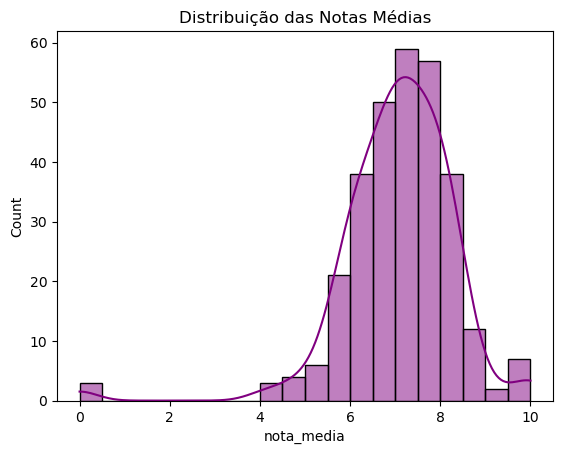

In [166]:
#Distribuição de notas médias

srn.histplot(df['nota_media'], bins=20, color='#800080', kde=True)
plt.title('Distribuição das Notas Médias')